In [59]:
def vertiopt(tH):
    na0 = [0] * tH
    na1 = [0] * tH
    nb0 = [0] * tH
    nb1 = [0] * tH
    na1[0] = 0
    nb1[0] = 0
    va0 = [0] * tH
    va1 = [0] * tH
    vb0 = [0] * tH
    vb1 = [0] * tH
    uab0 = [0] * tH
    uab1 = [1] * tH
    uba0 = [0] * tH
    uba1 = [2] * tH

    va1[1] = 0
    vb0[1] = 0
    vb1[1] = 0

    na0[1] = na0[0] + uba1[0] - uab0[0] - va0[0]
    na1[1] = na1[0] - uab1[0] - va1[0]
    nb0[1] = nb0[0] + uab1[0] - uba0[0] - vb0[0]
    nb1[1] = nb1[0] - uba1[0] - vb1[0]
    
    va0[1] = na0[0]
    vb0[1] = nb0[0]
    va1[1] = 0
    vb1[1] = 0

    for t in range(2, tH):
        uab0[t] = 0
        uba1[t] = 2
        va1[t] = 0
        uab1[t] = 1

        va0[t] = na0[t-1]
        vb0[t] = nb0[t-1] # Is this correct? When negative value comes in, it messes up
        uba0[t] = 0
        vb1[t] = 0

        na0[t] = na0[t-1] + uba1[t-1] - uab0[t-1] - va0[t-2] - va0[t-1] # If this is zero at the beginning, it will easily be negative
        na1[t] = na1[t-1] - uab1[t-1] + va0[t-2] - va1[t-2] - va1[t-1]
        nb0[t] = nb0[t-1] + uab1[t-1] - uba0[t-1] - vb0[t-2] - vb0[t-1]
        nb1[t] = nb1[t-1] - uba1[t-1] + vb0[t-2] - vb1[t-2] - vb1[t-1]

    return na0, na1, nb0, nb1, va0, va1, vb0, vb1, uab0, uab1, uba0, uba1


In [85]:
data = vertiopt(288)

In [86]:
na0, na1, nb0, nb1, va0, va1, vb0, vb1, uab0, uab1, uba0, uba1 = data[0], data[1] ,data[2], data[3], data[4], data[5], data[6], data[7], data[8], data[9], data[10], data[11]

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

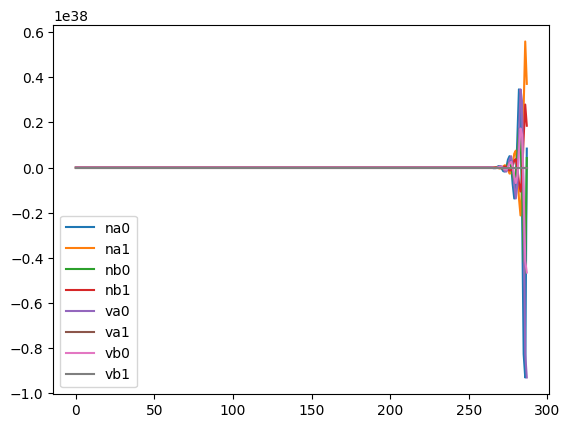

In [88]:
plt.figure()
plt.plot(na0, label='na0')
plt.plot(na1, label='na1')
plt.plot(nb0, label='nb0')
plt.plot(nb1, label='nb1')
plt.plot(va0, label='va0')
plt.plot(va1, label='va1')
plt.plot(vb0, label='vb0')
plt.plot(vb1, label='vb1')
plt.legend()
plt.show()

In [38]:
data[0]

[0, 2, 4, 4, 0, -6, -8, 0, 16, 26, 12, -28, -64, -46]